In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data file
df = pd.read_csv('IntervalIDBase14Intersections.txt', delimiter=';')

In [4]:
# data cleaning
num_df = df.iloc[:,0:65].copy().replace('()',0).replace(to_replace=r'^(.*)$', value=1, regex=True)

df_all_edge_detection = pd.DataFrame(np.zeros((df.index[0], 32)))
for i in range(32):
    df_all_edge_detection.iloc[:,i] = num_df.iloc[:,2*i+1] + num_df.iloc[:,2*i+2]


df_VehcileID_In = df.iloc[:,1:33]
    
df_VehcileID_Out = df.iloc[:,33:65]
    
df_traffic_light = pd.DataFrame(np.zeros((df.shape[0], 8)))
for i in range(65,73):
    temp = df.iloc[:,i]/2    
    df_traffic_light.iloc[:,i-65] = temp.astype(int)

edgeListIn = df.iloc[:,73:89].columns.values.tolist()
df_inIntersection_vehnum = pd.DataFrame(np.zeros((df.shape[0], 16)))
for i in range(73,89):   
    df_inIntersection_vehnum.iloc[:,i-73] = df.iloc[:,i]
    
edgeListOut = df.iloc[:,89:105].columns.values.tolist()    
df_outIntersection_vehnum = pd.DataFrame(np.zeros((df.shape[0], 16)))
for i in range(89,105):   
    df_outIntersection_vehnum.iloc[:,i-89] = df.iloc[:,i]

intersectionNameList = df.iloc[:,105:113].columns.values.tolist()
df_intersection_crowd_vehID = pd.DataFrame(np.zeros((df.shape[0], 8)))
for i in range(8):
    df_intersection_crowd_vehID.iloc[:,i] = df.iloc[:,i+105]

# I2 to I9
df_intersection_down_crowd_size = pd.DataFrame(np.zeros((df.shape[0], 8)))
for i in range(0,16,2):
    df_intersection_down_crowd_size.iloc[:,int(i/2)] = df_inIntersection_vehnum[i] + df_outIntersection_vehnum[i+1]

# I9 to I2
df_intersection_up_crowd_size = pd.DataFrame(np.zeros((df.shape[0], 8)))
for i in range(15,-1,-2):
    df_intersection_up_crowd_size.iloc[:,int((15-i)/2)] = df_inIntersection_vehnum[i] + df_outIntersection_vehnum[i-1]

In [5]:
def nonzero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    isNotZero = np.concatenate(([0], np.not_equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2) # -1 is the unspecified value, down't know how many pairs of value
    #ranges[:,1] = ranges[:,1] - 1
    return ranges

In [6]:
def nonNaN_runs(series):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    isNotNaN = np.concatenate(([0], pd.notna(series).view(np.int8), [0]))
    absdiff = np.abs(np.diff(isNotNaN))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2) # -1 is the unspecified value, down't know how many pairs of value
    #ranges[:,1] = ranges[:,1] - 1
    return ranges

In [7]:
def remove_result_intervalTooSmall(array):
    deleteIndexList = []
    for index in np.arange(array.shape[0]):
        if array[index,1]-array[index,0]<=5:
            deleteIndexList.extend([2*index, 2*index+1])
    new_a = np.delete(array, deleteIndexList)
    return new_a.reshape(-1, 2)

In [8]:
def remove_result_crowdSizeTooSamll(array,dataframe,i):
    index = 0
    deleteIndexList = []
    for (x,y) in array:
        if dataframe.iloc[x:y,i].max() <= 1:
            deleteIndexList.extend([2*index, 2*index+1])
        index = index + 1
    new_a = np.delete(array, deleteIndexList)
    return new_a.reshape(-1, 2)

In [9]:
def remove_result_intersectionCrowdSizeTooSamll(array,series):
    index = 0
    deleteIndexList = []
    qualifiedSet = []
    for (x,y) in array:
        intervalSet = set()
        for index_df,item in series.iloc[x:y].iteritems():
            intervalSet = intervalSet | set(item.split(','))
        if len(intervalSet) <= 2:
            deleteIndexList.extend([2*index, 2*index+1])
        else:
            qualifiedSet.append(intervalSet)
        index = index + 1
    new_a = np.delete(array, deleteIndexList)
    return (new_a.reshape(-1, 2),qualifiedSet)

In [10]:
def get_VehicleIDList_CurrentInterval(array,dataframe,i):
    VehicleIDList = []
    for (x,y) in array:
        currentIDList = ''
        for index, row in dataframe.iloc[x:y,i*2:i*2+2].iterrows():
            for item in row:
                if not item == '()':
                    currentIDList = currentIDList + item[2:-3] + ','
        VehicleIDList.append(currentIDList[0:-1])
    return VehicleIDList

In [43]:
crowdInterval = nonzero_runs(df_inIntersection_vehnum[1]) 
l = get_VehicleIDList_CurrentInterval(crowdInterval,df_VehcileID_In,1)
l

[['up_0'],
 ['up_3'],
 ['up_14',
  'up_19',
  'up_11',
  'up_15',
  'up_2',
  'up_31',
  'up_4',
  'up_33',
  'up_12',
  'up_7',
  'up_29',
  'up_37',
  'up_9',
  'up_21',
  'up_27',
  'up_17',
  'up_22'],
 ['up_43',
  'up_34',
  'up_51',
  'up_48',
  'up_46',
  'up_70',
  'up_35',
  'up_69',
  'up_44',
  'up_54',
  'up_66',
  'up_60',
  'up_73',
  'up_58',
  'up_79',
  'up_63',
  'up_84',
  'up_56',
  'up_76'],
 ['up_72',
  'up_78',
  'up_88',
  'up_81',
  'up_98',
  'up_74',
  'up_100',
  'up_80',
  'up_101',
  'up_90',
  'up_94',
  'up_107',
  'up_116',
  'up_102',
  'up_91',
  'up_104',
  'up_112',
  'up_109'],
 ['up_125',
  'up_118',
  'up_124',
  'up_128',
  'up_108',
  'up_134',
  'up_133',
  'up_110',
  'up_113',
  'up_132',
  'up_137',
  'up_120',
  'up_141',
  'up_130',
  'up_145',
  'up_127',
  'up_135',
  'up_149',
  'up_140',
  'up_150',
  'up_143',
  'up_156',
  'up_151',
  'up_154'],
 ['up_164',
  'up_161',
  'up_158',
  'up_153',
  'up_168',
  'up_160',
  'up_166',
  'u

In [10]:
#for i in [0,2,4,6,8,10,12,14]:
for i in [15,13,11,9,7,5,3,1]:
    crowdInterval = nonzero_runs(df_intersection_vehnum[i])
    qualifiedCrowInterval = remove_result_crowdSizeTooSamll(crowdInterval,i)
    print([crowdInterval.shape[0],qualifiedCrowInterval.shape[0]])

[81, 80]
[141, 140]
[142, 139]
[122, 121]
[166, 142]
[89, 74]
[116, 88]
[116, 85]


In [67]:
# create IN dataframe for crowd interval and vehiclesID
df_crowdInterval_vechicles_in = pd.DataFrame()
IDdataframe = df_VehcileID_In
Crowddataframe = df_inIntersection_vehnum

for (index,content) in enumerate(edgeListIn):    
    crowdInterval = nonzero_runs(df_inIntersection_vehnum[index])
    qualifiedCrowInterval = remove_result_crowdSizeTooSamll(crowdInterval,Crowddataframe,index)
    VehicleIDList = get_VehicleIDList_CurrentInterval(qualifiedCrowInterval,IDdataframe,index)
    EdgeName = [content] * qualifiedCrowInterval.shape[0]
    df_EdgeName = pd.DataFrame(data=EdgeName)
    df_VehicleIDList = pd.DataFrame(data=VehicleIDList)
    df_Current = pd.DataFrame(data = qualifiedCrowInterval)
    df_Current = pd.concat([df_EdgeName, df_Current, df_VehicleIDList], axis=1)
    df_crowdInterval_vechicles_in = df_crowdInterval_vechicles_in.append(df_Current, ignore_index = True)

df_crowdInterval_vechicles_in.columns=['Edge','IntervalStartTime','IntervalEndTime','VehicleInCrowd']

In [68]:
# the coding logic of out_crowd is different with in, should be double check

## create IN and out dataframe for crowd interval and vehiclesID
## columns=['Edge','IntervalStartTime','IntervalEndTime','VehicleInCrowd']
#df_crowdInterval_vechicles_out = pd.DataFrame()
#IDdataframe = df_VehcileID_Out
#Crowddataframe = df_outIntersection_vehnum
#for (index,content) in enumerate(edgeListOut):
#    crowdInterval = nonzero_runs(df_outIntersection_vehnum[index])
#    qualifiedCrowInterval = remove_result_crowdSizeTooSamll(crowdInterval,Crowddataframe,index)
#    VehicleIDList = get_VehicleIDList_CurrentInterval(qualifiedCrowInterval,IDdataframe,index)
#    EdgeName = [content] * qualifiedCrowInterval.shape[0]
#    df_EdgeName = pd.DataFrame(data=EdgeName)
#    df_VehicleIDList = pd.DataFrame(data=VehicleIDList)
#    df_Current = pd.DataFrame(data = qualifiedCrowInterval)
#    df_Current = pd.concat([df_EdgeName, df_Current, df_VehicleIDList], axis=1)
#    df_crowdInterval_vechicles_out = df_crowdInterval_vechicles_out.append(df_Current, ignore_index = True)
#df_crowdInterval_vechicles_out.columns=['Edge','IntervalStartTime','IntervalEndTime','VehicleInCrowd']

In [12]:
# create dataframe for crowd interval and a list for vehiclesIDSet
df_intersection_crowdInterval = pd.DataFrame()
intersectionsIntervalsVehSetList = []

for (index,content) in enumerate(intersectionNameList):    
    vehIDSeries = df_intersection_crowd_vehID[index]
    crowdInterval = nonNaN_runs(vehIDSeries)
    qualifiedCrowIntervals,vehIDSets = remove_result_intersectionCrowdSizeTooSamll(crowdInterval,vehIDSeries)
    intersectionName = [content] * qualifiedCrowIntervals.shape[0]
    df_intersectionName = pd.DataFrame(data=intersectionName)
    df_Current = pd.DataFrame(data = qualifiedCrowIntervals)
    df_Current = pd.concat([df_intersectionName, df_Current], axis=1)
    df_intersection_crowdInterval = df_intersection_crowdInterval.append(df_Current, ignore_index = True)
    intersectionsIntervalsVehSetList = intersectionsIntervalsVehSetList + vehIDSets
    
df_intersection_crowdInterval.columns=['Intersection','IntervalStartTime','IntervalEndTime']

In [14]:
df_intersection_crowdInterval

,Intersection,IntervalStartTime,IntervalEndTime
0,I2,237,310
1,I2,331,400
2,I2,423,503
3,I2,514,585
4,I2,586,677
5,I2,678,704
6,I2,711,763
7,I2,772,859
8,I2,862,952
9,I2,954,1044


In [242]:
array = nonNaN_runs(df.iloc[:,105])
new_array,setList = remove_result_intersectionCrowdSizeTooSamll(array,df.iloc[:,105])

In [127]:
targetSet = set(df_crowdInterval_vechicles_in[df_crowdInterval_vechicles_in['Edge'] == 'in_E12']['VehicleInCrowd'].iloc[76].split(","))
targetSetLength = len(targetSet)

for index,item in df_crowdInterval_vechicles_in[df_crowdInterval_vechicles_in['Edge'] == 'in_E89']['VehicleInCrowd'].iteritems():
    currentset = set(item.split(","))
    commonSet = targetSet & currentset
    print(index,targetSetLength,len(currentset),len(commonSet))

1564 10 20 0
1565 10 16 0
1566 10 23 0
1567 10 19 0
1568 10 17 0
1569 10 16 0
1570 10 16 0
1571 10 17 0
1572 10 18 0
1573 10 16 0
1574 10 19 0
1575 10 20 0
1576 10 19 0
1577 10 15 0
1578 10 17 0
1579 10 22 0
1580 10 21 0
1581 10 15 0
1582 10 19 0
1583 10 18 0
1584 10 19 0
1585 10 15 0
1586 10 8 0
1587 10 9 0
1588 10 14 0
1589 10 22 0
1590 10 20 0
1591 10 18 0
1592 10 18 0
1593 10 14 0
1594 10 21 0
1595 10 18 0
1596 10 21 0
1597 10 18 0
1598 10 18 0
1599 10 15 0
1600 10 15 0
1601 10 17 0
1602 10 16 0
1603 10 20 0
1604 10 2 0
1605 10 18 0
1606 10 18 0
1607 10 15 0
1608 10 17 0
1609 10 19 0
1610 10 17 0
1611 10 21 0
1612 10 20 0
1613 10 18 0
1614 10 17 0
1615 10 17 0
1616 10 16 0
1617 10 17 0
1618 10 16 0
1619 10 20 0
1620 10 15 0
1621 10 22 0
1622 10 16 0
1623 10 16 0
1624 10 18 0
1625 10 22 0
1626 10 20 0
1627 10 17 0
1628 10 17 0
1629 10 15 0
1630 10 2 0
1631 10 17 0
1632 10 17 0
1633 10 17 0
1634 10 17 0
1635 10 10 10


In [169]:
# Caculate OD_delay_deliverRatioList for single direction
OD_dealy_deliveRatioList = []
for i in [0,2,4,6,8,10,12,14]:
    for j in range(i+2,16,2):
#for i in [15,13,11,9,7,5,3,1]:
#    for j in range(i-2,-1,-2):
        originEdge = edgeListIn[i]
        destinationEdge = edgeListIn[j]
        OD_pair = originEdge+'-'+destinationEdge
        crowdCompareList=[]
        for indexOrigin, rowOrigin in df_crowdInterval_vechicles_in[df_crowdInterval_vechicles_in['Edge'] == originEdge].iterrows():
            originSet = set(rowOrigin['VehicleInCrowd'].split(","))
            originStartTime = rowOrigin['IntervalStartTime']
            originSetLength = len(originSet)
            len_commonSet = 0
            record = []
            
            for indexDestination,rowDestination in df_crowdInterval_vechicles_in[df_crowdInterval_vechicles_in['Edge'] == destinationEdge].iterrows():
                destinationStartTime = rowDestination['IntervalStartTime']
                destinationEndTime = rowDestination['IntervalEndTime']
                delay = destinationStartTime - originStartTime
                if destinationEndTime >= originStartTime and delay <= 610:
                    destinationSet = set(rowDestination['VehicleInCrowd'].split(","))
                    commonSet = originSet & destinationSet
                    current_len_commonSet = len(commonSet)
                    if current_len_commonSet >= len_commonSet:
                        len_commonSet = current_len_commonSet
                        record = [originSetLength,len(destinationSet),delay,len_commonSet,len_commonSet/originSetLength]
                else:
                    continue
            
            crowdCompareList.append(record)
        df_crowdCompare = pd.DataFrame(data=crowdCompareList,columns=['originSize','destinationSize','delay','finalArrivalSize','arrivalRatio'])
        OD_dealy_deliveRatioList.append([OD_pair,df_crowdCompare['delay'].mean(),df_crowdCompare['arrivalRatio'].mean()])

In [167]:
df_OD_dealy_deliveRatio = pd.DataFrame(data=OD_dealy_deliveRatioList,columns=['OD_Pair','Avg_Link_Delay','Avf_Arrivial_Ratio'])

In [170]:
df_OD_dealy_deliveRatio2 = pd.DataFrame(data=OD_dealy_deliveRatioList,columns=['OD_Pair','Avg_Link_Delay','Avf_Arrivial_Ratio'])

In [168]:
#df_OD_dealy_deliveRatio.to_excel("OD_dealy_deliveRatio.xlsx",sheet_name='North_to_South')
df_OD_dealy_deliveRatio.to_excel("OD_dealy_deliveRatio.xlsx",sheet_name='South_to_North')


In [171]:
with pd.ExcelWriter('OD_dealy_deliveRatio.xlsx') as writer:  # doctest: +SKIP
    df_OD_dealy_deliveRatio2.to_excel(writer, sheet_name='North_to_South')
    df_OD_dealy_deliveRatio.to_excel(writer, sheet_name='South_to_North')

In [156]:
df_crowdCompare = pd.DataFrame(data=crowdCompareList,columns=['originSize','destinationSize','delay','finalArrivalSize','arrivalRatio'])

In [158]:
df_crowdCompare['delay'].mean()

352.72727272727275

In [159]:
df_crowdCompare['arrivalRatio'].mean()

0.9824590772696037

In [355]:
a= np.int64(np.array([[1,5],[1,12],[1,4],[1,11],[1,10]]))
a

array([[ 1,  5],
       [ 1, 12],
       [ 1,  4],
       [ 1, 11],
       [ 1, 10]], dtype=int64)

In [372]:
remove_unqualified_result(a)

array([[ 1, 12],
       [ 1, 11],
       [ 1, 10]], dtype=int64)

In [295]:
runs

array([[ 258,  277],
       [ 310,  329],
       [ 352,  369],
       [ 403,  419],
       [ 444,  465],
       [ 495,  516],
       [ 535,  558],
       [ 586,  604],
       [ 628,  645],
       [ 678,  697],
       [ 707,  745],
       [ 771,  783],
       [ 812,  829],
       [ 862,  878],
       [ 904,  926],
       [ 954,  972],
       [ 997, 1013],
       [1046, 1063],
       [1088, 1110],
       [1139, 1154],
       [1181, 1197],
       [1230, 1250],
       [1272, 1294],
       [1323, 1340],
       [1364, 1381],
       [1414, 1432],
       [1456, 1478],
       [1506, 1521],
       [1548, 1570],
       [1598, 1613],
       [1640, 1662],
       [1690, 1711],
       [1733, 1749],
       [1782, 1803],
       [1825, 1846],
       [1874, 1889],
       [1916, 1938],
       [1966, 1985],
       [2009, 2025],
       [2057, 2076],
       [2100, 2121],
       [2151, 2168],
       [2193, 2209],
       [2243, 2257],
       [2285, 2306],
       [2335, 2350],
       [2376, 2398],
       [2426,

In [290]:
runs.append([6590,6593])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
runs

In [284]:
runs = remove_unqualified_result(runs)

In [291]:
runs.size

276

In [287]:
runs

array([[ 258,  277],
       [ 310,  329],
       [ 352,  369],
       [ 403,  419],
       [ 444,  465],
       [ 495,  516],
       [ 535,  558],
       [ 586,  604],
       [ 628,  645],
       [ 678,  697],
       [ 707,  745],
       [ 771,  783],
       [ 812,  829],
       [ 862,  878],
       [ 904,  926],
       [ 954,  972],
       [ 997, 1013],
       [1046, 1063],
       [1088, 1110],
       [1139, 1154],
       [1181, 1197],
       [1230, 1250],
       [1272, 1294],
       [1323, 1340],
       [1364, 1381],
       [1414, 1432],
       [1456, 1478],
       [1506, 1521],
       [1548, 1570],
       [1598, 1613],
       [1640, 1662],
       [1690, 1711],
       [1733, 1749],
       [1782, 1803],
       [1825, 1846],
       [1874, 1889],
       [1916, 1938],
       [1966, 1985],
       [2009, 2025],
       [2057, 2076],
       [2100, 2121],
       [2151, 2168],
       [2193, 2209],
       [2243, 2257],
       [2285, 2306],
       [2335, 2350],
       [2376, 2398],
       [2426,

In [ ]:
crowdStratTime = 0
crowdFlag = 0
crowdEndTime = 0

for time, size in df_intersection_down_crowd_size[2].iteritems():
    if size != 0:
        if crowdFlag == 0:
            
        
        

In [162]:
# caculate the interval between vehicle crowd, all intersections  --V3.0

nums = range(0,32)
intervalList = []
minCrowdSize = 3
maxTimeIntervalInCrowd = 3
crowdSizeList = []

for num in nums:
    interval = 0
    firstVehicleInterval = 0
    detectorInterval = []
    currentTimeIntervalInCrowd = 0
    currentCrowdSize = 0
    crowdFlag = 0
    firstVehicleFlag = 0
    currentCrowdSizeList = []
    for key, value in df_all_edge_detection.iloc[:,num].iteritems(): 
        interval = interval + 1
        if value == 0:
            # not a crowd, just one or two vehicle
            if firstVehicleFlag == 1 and interval - firstVehicleInterval >= maxTimeIntervalInCrowd:
                currentCrowdSize = 0
                firstVehicleFlag = 0
                firstVehicleInterval = 0                        
            
            if interval == maxTimeIntervalInCrowd and crowdFlag == 1:
                currentCrowdSizeList.append(currentCrowdSize)
                crowdFlag = 0
                currentCrowdSize = 0

        else:
            currentCrowdSize = currentCrowdSize + 1        
            if currentCrowdSize >= minCrowdSize:            
                if crowdFlag == 0:
                    detectorInterval.append(firstVehicleInterval)
                    firstVehicleInterval = 0
                    firstVehicleFlag = 0
                crowdFlag = 1
                interval = 0
            elif currentCrowdSize == 1:
                if crowdFlag == 0:
                    firstVehicleInterval = interval
                    firstVehicleFlag = 1
            else:
                # if current 1< veh# < 3, interval still increase
                continue
    
    if crowdFlag == 1:
        currentCrowdSizeList.append(currentCrowdSize)
    
    intervalList.append(detectorInterval)
    crowdSizeList.append(currentCrowdSizeList)

Text(0, 0.5, 'Average Interarrival Time')

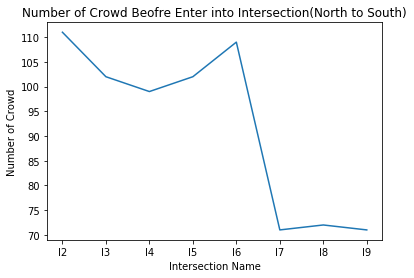

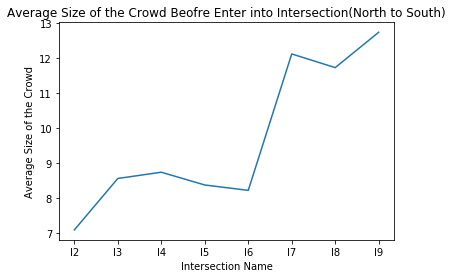

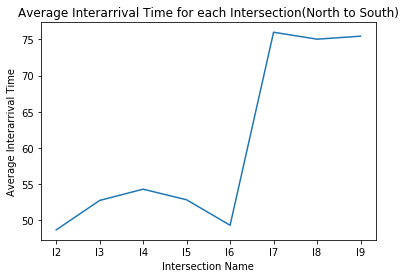

In [163]:
numOfCrowdAtEachIntersectionList = []
AvgSizeIfCrowdAtEachIntersectionList = []
AvgCrowdInterArrivalTimeList = []
for i in [0,2,4,6,8,10,12,14]:
    numOfCrowdAtThisIntersection = len(crowdSizeList[i])
    SumOfintervalAtThisIntersection = sum(intervalList[i][1:])
    TotalSizeOfCrowdAtThisIntersection = sum(crowdSizeList[i])
    numOfCrowdAtEachIntersectionList.append(numOfCrowdAtThisIntersection)
    AvgSizeIfCrowdAtEachIntersectionList.append(TotalSizeOfCrowdAtThisIntersection/numOfCrowdAtThisIntersection)
    AvgCrowdInterArrivalTimeList.append(SumOfintervalAtThisIntersection/(numOfCrowdAtThisIntersection-1))
    
IntersectionNames = ['I2','I3','I4','I5','I6','I7','I8','I9']    
plt.figure()
plt.plot(IntersectionNames,numOfCrowdAtEachIntersectionList)
plt.title("Number of Crowd Beofre Enter into Intersection(North to South)")
plt.xlabel('Intersection Name')
plt.ylabel('Number of Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgSizeIfCrowdAtEachIntersectionList)
plt.title("Average Size of the Crowd Beofre Enter into Intersection(North to South)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Size of the Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgCrowdInterArrivalTimeList)
plt.title("Average Interarrival Time for each Intersection(North to South)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Interarrival Time')

Text(0, 0.5, 'Average Interarrival Time')

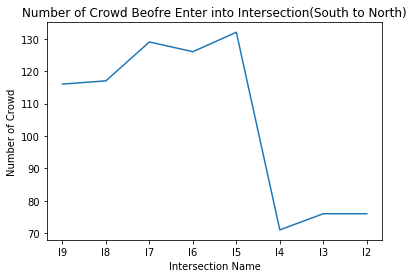

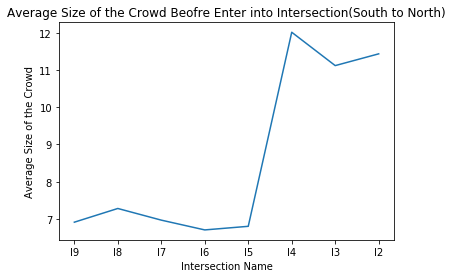

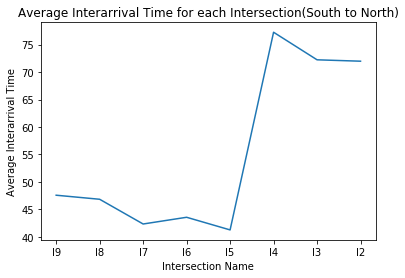

In [164]:
numOfCrowdAtEachIntersectionList = []
AvgSizeIfCrowdAtEachIntersectionList = []
AvgCrowdInterArrivalTimeList = []
for i in [15,13,11,9,7,5,3,1]:
    numOfCrowdAtThisIntersection = len(crowdSizeList[i])
    SumOfintervalAtThisIntersection = sum(intervalList[i][1:])
    TotalSizeOfCrowdAtThisIntersection = sum(crowdSizeList[i])
    numOfCrowdAtEachIntersectionList.append(numOfCrowdAtThisIntersection)
    AvgSizeIfCrowdAtEachIntersectionList.append(TotalSizeOfCrowdAtThisIntersection/numOfCrowdAtThisIntersection)
    AvgCrowdInterArrivalTimeList.append(SumOfintervalAtThisIntersection/(numOfCrowdAtThisIntersection-1))
    
IntersectionNames = ['I9','I8','I7','I6','I5','I4','I3','I2']    
plt.figure()
plt.plot(IntersectionNames,numOfCrowdAtEachIntersectionList)
plt.title("Number of Crowd Beofre Enter into Intersection(South to North)")
plt.xlabel('Intersection Name')
plt.ylabel('Number of Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgSizeIfCrowdAtEachIntersectionList)
plt.title("Average Size of the Crowd Beofre Enter into Intersection(South to North)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Size of the Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgCrowdInterArrivalTimeList)
plt.title("Average Interarrival Time for each Intersection(South to North)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Interarrival Time')

In [165]:
# the following is to caculate the link delay
# up and down link
detectorDownNameList = ["e1Detector_E12_0_0","e1Detector_E12_1_1","e1Detector_E23_0_4","e1Detector_E23_1_5",
                        "e1Detector_E34_0_8","e1Detector_E34_1_9","e1Detector_E45_0_12","e1Detector_E45_1_13",
                        "e1Detector_E56_0_16","e1Detector_E56_1_17","e1Detector_E67_0_20","e1Detector_E67_1_21",
                        "e1Detector_E78_0_24","e1Detector_E78_1_25","e1Detector_E89_0_28","e1Detector_E89_1_29"]
detectorUpNameList = ["e1Detector_E09_1_30","e1Detector_E09_0_31","e1Detector_E98_1_26","e1Detector_E98_0_27",
                      "e1Detector_E87_1_22","e1Detector_E87_0_23","e1Detector_E76_1_18","e1Detector_E76_0_19",
                      "e1Detector_E65_1_14","e1Detector_E65_0_15","e1Detector_E54_1_10","e1Detector_E54_0_11",
                      "e1Detector_E43_1_6","e1Detector_E43_0_7","e1Detector_E32_1_2","e1Detector_E32_0_3"]
detectorOutDownNameList = ["out_e1Detector_E23_0_4","out_e1Detector_E23_1_5","out_e1Detector_E34_0_8","out_e1Detector_E34_1_9",
                           "out_e1Detector_E45_0_12","out_e1Detector_E45_1_13","out_e1Detector_E56_0_16","out_e1Detector_E56_1_17",
                           "out_e1Detector_E67_0_20","out_e1Detector_E67_1_21","out_e1Detector_E78_0_24","out_e1Detector_E78_1_25",
                           "out_e1Detector_E89_0_28","out_e1Detector_E89_1_29","out_e1Detector_E90_1_30","out_e1Detector_E90_0_31"]
detectorOutUpNameList = ["out_e1Detector_E98_1_26","out_e1Detector_E98_0_27","out_e1Detector_E87_1_22","out_e1Detector_E87_0_23",
                         "out_e1Detector_E76_1_18","out_e1Detector_E76_0_19","out_e1Detector_E65_1_14","out_e1Detector_E65_0_15",
                         "out_e1Detector_E54_1_10","out_e1Detector_E54_0_11","out_e1Detector_E43_1_6","out_e1Detector_E43_0_7",
                         "out_e1Detector_E32_1_2","out_e1Detector_E32_0_3","out_e1Detector_E21_0_0","out_e1Detector_E21_1_1"]

carIDFile = open('carIDFile14Intersections.txt', "r")
for line in carIDFile:
    carIDList = line.split(",")
carIDFile.close() 

carDownIDList = []
carUpIDList = []
for carID in carIDList:
    if carID[0] == "u":
        carUpIDList.append(carID)
    else:
        carDownIDList.append(carID)

In [166]:
# caculate vehicle delay, v2.0
df_ID_DownEdge_Time = pd.DataFrame(columns =  ["carID", "DownEdge", "Timestamp"])
i = 0
for carID in carDownIDList:
    for edge in detectorDownNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_DownEdge_Time.loc[i] = [carID,edge[11:14],index]
                i = i + 1
                break

In [167]:
df_ID_UpEdge_Time = pd.DataFrame(columns =  ["carID", "UpEdge", "Timestamp"])
i = 0
for carID in carUpIDList:
    for edge in detectorUpNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_UpEdge_Time.loc[i] = [carID,edge[11:14],index]
                i = i + 1
                break

In [168]:
df_ID_DownOutEdge_Time = pd.DataFrame(columns =  ["carID", "DownEdge", "Timestamp"])
i = 0
for carID in carDownIDList:
    for edge in detectorOutDownNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_DownOutEdge_Time.loc[i] = [carID,edge[15:18],index]
                i = i + 1
                break

In [169]:
df_ID_UpOutEdge_Time = pd.DataFrame(columns =  ["carID", "UpEdge", "Timestamp"])
i = 0
for carID in carUpIDList:
    for edge in detectorOutUpNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_UpOutEdge_Time.loc[i] = [carID,edge[15:18],index]
                i = i + 1
                break

In [66]:
df_ID_DownEdge_delay = pd.DataFrame(columns =  ["carID", "DownEdge", "delay"])
i = 0
for index, row in df_ID_DownEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_DownEdge_delay.loc[i] = [row['carID'],row['DownEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [70]:
df_ID_UpEdge_delay = pd.DataFrame(columns =  ["carID", "UpEdge", "delay"])
i = 0
for index, row in df_ID_UpEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_UpEdge_delay.loc[i] = [row['carID'],row['UpEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [71]:
df_ID_DownOutEdge_delay = pd.DataFrame(columns =  ["carID", "DownEdge", "delay"])
i = 0
for index, row in df_ID_DownOutEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_DownOutEdge_delay.loc[i] = [row['carID'],row['DownEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [72]:
df_ID_UpOutEdge_delay = pd.DataFrame(columns =  ["carID", "UpEdge", "delay"])
i = 0
for index, row in df_ID_UpOutEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_UpOutEdge_delay.loc[i] = [row['carID'],row['UpEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [77]:
df_ID_UpOutEdge_delay[df_ID_UpOutEdge_delay["carID"] == "up_1908"]

,carID,UpEdge,delay
6727,up_1908,E87,30
6728,up_1908,E76,62
6729,up_1908,E65,31
6730,up_1908,E54,67
6731,up_1908,E43,30
6732,up_1908,E32,61
6733,up_1908,E21,24


In [78]:
df_ID_UpEdge_delay[df_ID_UpEdge_delay["carID"] == "up_1908"]

,carID,UpEdge,delay
6727,up_1908,E98,74
6728,up_1908,E87,17
6729,up_1908,E76,75
6730,up_1908,E65,66
6731,up_1908,E54,31
6732,up_1908,E43,23
6733,up_1908,E32,62


In [79]:
df_ID_DownOutEdge_delay[df_ID_DownOutEdge_delay["carID"] == "down_1909"]

,carID,DownEdge,delay
6629,down_1909,E34,25
6630,down_1909,E45,66
6631,down_1909,E56,31
6632,down_1909,E67,66
6633,down_1909,E78,29
6634,down_1909,E89,63
6635,down_1909,E90,29


In [80]:
df_ID_DownEdge_delay[df_ID_DownEdge_delay["carID"] == "down_1909"]

,carID,DownEdge,delay
6629,down_1909,E23,71
6630,down_1909,E34,23
6631,down_1909,E45,74
6632,down_1909,E56,66
6633,down_1909,E67,29
6634,down_1909,E78,17
6635,down_1909,E89,75


In [86]:
df.columns[1 + 16*2]

'out_e1Detector_E21_0_0'

In [ ]:
# caculate the interval and delay between vehicle crowd, all intersections  --V4.0

detectorNums = range(0,32)
intervalList = []
minCrowdSize = 3
maxTimeIntervalInCrowd = 3
crowdSizeList = []
DelayList = []

for detectorNum in detectorNums:
    interval = 0
    firstVehicleInterval = 0
    detectorInterval = []
    currentTimeIntervalInCrowd = 0
    currentCrowdSize = 0
    currentIntersectionDelayList = []
    currentCrowdDelayList = []    
    crowdFlag = 0
    firstVehicleFlag = 0
    currentCrowdSizeList = []
    
    for key, value in df_all_edge_detection.iloc[:,detectorNum].iteritems(): 
        interval = interval + 1
        if value == 0:
            # not a crowd, just one or two vehicle
            if firstVehicleFlag == 1 and interval - firstVehicleInterval >= maxTimeIntervalInCrowd:
                currentCrowdSize = 0
                firstVehicleFlag = 0
                firstVehicleInterval = 0                        
            
            if interval == maxTimeIntervalInCrowd and crowdFlag == 1:
                # caculate current crowd size & delay. As for crowd Delay, average of all vehicle
                currentCrowdSizeList.append(currentCrowdSize)
                currentIntersectionDelayList.append(int(np.mean(crowdDelayList)))
                crowdFlag = 0
                currentCrowdSize = 0

        else:
            currentCrowdSize = currentCrowdSize + 1
            
            #drive in, down, first detector is the first
            if detectorNum in [0,2,4,6,8,10,12,14]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_DownEdge_delay['delay'][df_ID_DownEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
            #drive in, up, first detector is the last
            elif detectorNum in [1,3,5,7,9,11,13,15]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_UpEdge_delay['delay'][df_ID_UpEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
            #drive out, down, first detector is the first
            elif detectorNum in [18,20,22,24,26,28,30,31]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_DownOutEdge_delay['delay'][df_ID_DownOutEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
            #drive out, up, first detector is the last
            elif detectorNum in [16,17,19,21,23,25,27,29]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_UpOutEdge_delay['delay'][df_ID_UpOutEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
                        
                        
            if currentCrowdSize >= minCrowdSize:            
                if crowdFlag == 0:
                    detectorInterval.append(firstVehicleInterval)
                    firstVehicleInterval = 0
                    firstVehicleFlag = 0
                crowdFlag = 1
                interval = 0
            elif currentCrowdSize == 1:
                if crowdFlag == 0:
                    firstVehicleInterval = interval
                    firstVehicleFlag = 1
            else:
                # if current 1< veh# < 3, interval still increase
                continue
    
    if crowdFlag == 1:
        currentCrowdSizeList.append(currentCrowdSize)
    
    intervalList.append(detectorInterval)
    crowdSizeList.append(currentCrowdSizeList)